# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


In [3]:
sa_vouchers.shape

(127526, 13)

The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [4]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-4-b1ee4bfe672a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [5]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD
LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ALBANY,999.0,999.0,977.0,987.0
ALBURY,964.0,964.0,967.0,979.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0


In [6]:
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [7]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [8]:
sa_vouchers_scores.Voucher_Value.unique()

array([50, 30, 40, 25, 20, 35, 45, 41, 31, 13,  5, 10, 32, 15, 49, 34, 39,
       27], dtype=int64)

In [9]:
Questions:

Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?
Are some sports more popular in different parts of the state?
Are any electorates over/under represented in their use of vouchers?
Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

SyntaxError: invalid syntax (<ipython-input-9-2ddf1852de65>, line 1)

In [10]:
df = sa_vouchers_scores[sa_vouchers_scores['Voucher_Sport'].isnull()]

In [11]:
sa_vouchers_scores.Voucher_Sport.describe()

count               127526
unique                  50
top       Australian Rules
freq                 47224
Name: Voucher_Sport, dtype: object

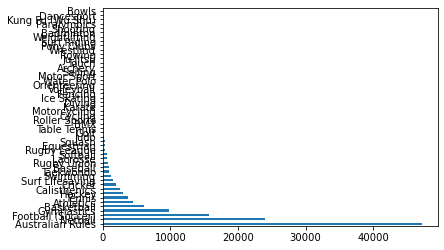

In [12]:
sa_vouchers_scores['Voucher_Sport'].value_counts().plot(kind = 'barh')
plt.show()

<AxesSubplot:>

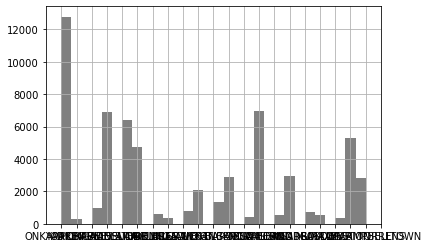

In [68]:
sa_vouchers_scores['Participant_LGA'].hist(bins = 30, range=[0, 20], facecolor='gray')

# Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?

In [14]:
sa_vouchers['Voucher_Sport'].value_counts()

Australian Rules     47224
Netball              24017
Football (Soccer)    15775
Gymnastics            9823
Basketball            6016
Athletics             4518
Tennis                3742
Hockey                3026
Calisthenics          2522
Cricket               1875
Surf Lifesaving       1442
Swimming              1204
Taekwondo              910
Baseball               865
Rugby Union            734
Lacrosse               656
Softball               548
Rugby League           270
Equestrian             265
Squash                 249
Judo                   210
Golf                   188
Table Tennis           166
BMX                    157
Roller Sports          148
Cycling                105
Motorcycling            97
Karate                  91
Diving                  89
Ice Skating             86
Fencing                 84
Volleyball              62
Orienteering            56
Water Polo              48
Motor Sport             45
Sailing                 40
Archery                 34
T

Clearly Australian Rules, Netball and Football are most popular sports for Voucher Usage in terms of Frequency.

In [15]:
sa_vouchers['Participant_LGA'].value_counts()

ONKAPARINGA          12782
SALISBURY             8169
TEA TREE GULLY        7219
PLAYFORD              6940
CHARLES STURT         6897
                     ...  
FRANKLIN HARBOUR       155
ORROROO/CARRIETON      137
FLINDERS RANGES        102
PETERBOROUGH            45
COOBER PEDY             39
Name: Participant_LGA, Length: 69, dtype: int64

Clearly ONKAPARINGA, SALISBURY and TEA TREE GULLY are most popular LGA for Voucher Usage in terms of Frequency.

In [ ]:
sa_vouchers_scores['Voucher_Sport'].value_counts().plot(kind = 'barh')
plt.show()

# Are some sports more popular in different parts of the state?

In [16]:
sa_vouchers[['Participant_LGA','Voucher_Sport']].value_counts()

Participant_LGA        Voucher_Sport   
ONKAPARINGA            Australian Rules    5258
SALISBURY              Australian Rules    2856
PLAYFORD               Australian Rules    2580
PORT ADELAIDE ENFIELD  Australian Rules    2453
MARION                 Australian Rules    2362
                                           ... 
RENMARK PARINGA        Equestrian             1
HOLDFAST BAY           Touch                  1
TEA TREE GULLY         Pony Clubs             1
ADELAIDE PLAINS        Surf Lifesaving        1
MARION                 Paralympics            1
Length: 1157, dtype: int64

In [17]:
sports_lga = pd.DataFrame(sa_vouchers_scores[['Participant_LGA','Voucher_Sport']].value_counts(), columns=['Voucher_Count'],)


In [18]:
sports_lga = sports_lga.sort_values(by = ['Participant_LGA','Voucher_Count'], ascending=[True,False])
sports_lga.reset_index(inplace = True)

In [19]:
sports_lga

,Participant_LGA,Voucher_Sport,Voucher_Count
0,ADELAIDE,Australian Rules,130
1,ADELAIDE,Football (Soccer),27
2,ADELAIDE,Netball,23
3,ADELAIDE,Gymnastics,20
4,ADELAIDE,Hockey,17
...,...,...,...
1152,YORKE PENINSULA,Equestrian,6
1153,YORKE PENINSULA,Surf Lifesaving,4
1154,YORKE PENINSULA,Karate,2
1155,YORKE PENINSULA,Motorcycling,2


Yes some sports are definetly more popular than other sports in every State

In [67]:
# count = 10
for i in sports_lga["Participant_LGA"].unique():
    count = count -1
#     if(count == 0):
#         break
    print("In", i, "state, ", sports_lga[sports_lga["Participant_LGA"] == i].iloc[0].Voucher_Sport , " is most famous sport by Voucher Count -",  sports_lga[sports_lga["Participant_LGA"] == i].iloc[0].Voucher_Count  )

In ADELAIDE state,  Australian Rules  is most famous sport by Voucher Count - 130
In ADELAIDE HILLS state,  Australian Rules  is most famous sport by Voucher Count - 1412
In ADELAIDE PLAINS state,  Australian Rules  is most famous sport by Voucher Count - 485
In ALEXANDRINA state,  Australian Rules  is most famous sport by Voucher Count - 980
In BAROSSA state,  Australian Rules  is most famous sport by Voucher Count - 1196
In BARUNGA WEST state,  Netball  is most famous sport by Voucher Count - 193
In BERRI BARMERA state,  Australian Rules  is most famous sport by Voucher Count - 545
In BURNSIDE state,  Australian Rules  is most famous sport by Voucher Count - 747
In CAMPBELLTOWN state,  Australian Rules  is most famous sport by Voucher Count - 1186
In CEDUNA state,  Australian Rules  is most famous sport by Voucher Count - 211
In CHARLES STURT state,  Australian Rules  is most famous sport by Voucher Count - 2147
In CLARE AND GILBERT VALLEYS state,  Australian Rules  is most famous sp

# Are any electorates over/under represented in their use of vouchers?

In [21]:
sa_vouchers['Participant_Electorate'].value_counts()[:10]

HEYSEN           6066
FROME            4445
SCHUBERT         4252
FLINDERS         4242
MACKILLOP        4195
CHAFFEY          4167
LITTLE PARA      4123
MOUNT GAMBIER    4066
GOYDER           3592
LIGHT            3577
Name: Participant_Electorate, dtype: int64

In [22]:
sa_vouchers['Participant_Electorate'].value_counts()[-10:]

CROYDON          1707
REYNELL          1689
UNLEY            1631
ADELAIDE         1574
WEST TORRENS     1566
TORRENS          1495
DUNSTAN          1462
ENFIELD          1064
WRIGHT            926
NO ELECTORATE     595
Name: Participant_Electorate, dtype: int64

Yes Wright and Enfield are under represented

# Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [56]:
seifa.INDEX_TYPE.unique()

array(['IRSAD', 'IRSD', 'IER', 'IEO'], dtype=object)

# IRSAD

In [46]:
sefia_lga = pd.DataFrame(sa_vouchers_scores[['Participant_LGA','IRSAD']].value_counts(), columns=['Voucher_Count'],)
sefia_lga = sefia_lga.sort_values(by = ['IRSAD'], ascending=True)
sefia_lga.reset_index(inplace = True)

In [48]:
sefia_lga

,Participant_LGA,IRSAD,Voucher_Count
0,PETERBOROUGH,808.0,45
1,PLAYFORD,868.0,6940
2,COOBER PEDY,869.0,39
3,MURRAY BRIDGE,887.0,1462
4,WHYALLA,897.0,2488
...,...,...,...
57,UNLEY,1071.0,2266
58,WALKERVILLE,1076.0,386
59,ADELAIDE HILLS,1077.0,4756
60,ROXBY DOWNS,1086.0,234


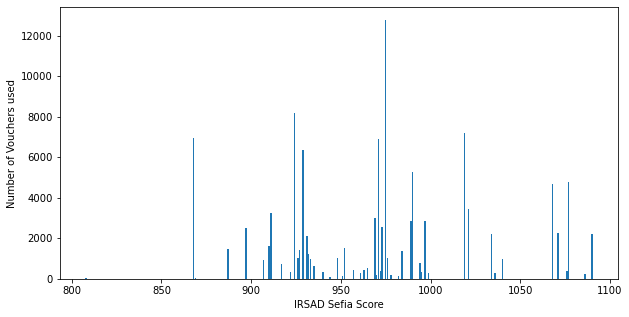

In [49]:
x= sefia_lga['IRSAD']
y= sefia_lga['Voucher_Count']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y) 
plt.xlabel("IRSAD Sefia Score")
plt.ylabel('Number of Vouchers used')
 
plt.show()

Text(0, 0.5, 'Number of Vouchers used')

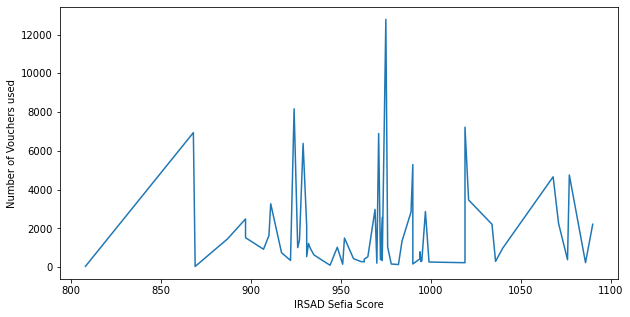

In [51]:
x= sefia_lga['IRSAD']
y= sefia_lga['Voucher_Count']
fig = plt.figure(figsize = (10, 5))
plt.plot(x, y) 
plt.xlabel("IRSAD Sefia Score")
plt.ylabel('Number of Vouchers used')
 
# plt.show()

# IRSD

In [64]:
sefia_lga = pd.DataFrame(sa_vouchers_scores[['Participant_LGA','IRSD']].value_counts(), columns=['Voucher_Count'],)
sefia_lga = sefia_lga.sort_values(by = ['IRSD'], ascending=True)
sefia_lga.reset_index(inplace = True)

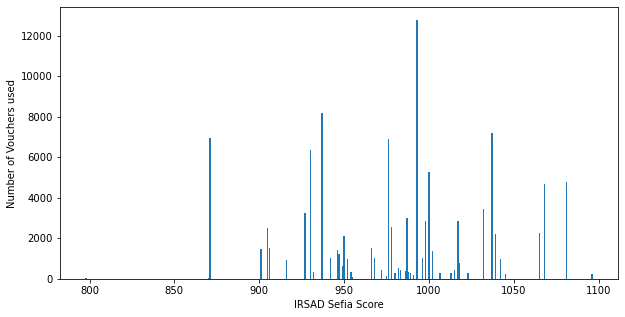

In [66]:
x= sefia_lga['IRSD']
y= sefia_lga['Voucher_Count']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y) 
plt.xlabel("IRSAD Sefia Score")
plt.ylabel('Number of Vouchers used')
 
plt.show()

# IER 

In [57]:
sefia_lga = pd.DataFrame(sa_vouchers_scores[['Participant_LGA','IER']].value_counts(), columns=['Voucher_Count'],)
sefia_lga = sefia_lga.sort_values(by = ['IER'], ascending=True)
sefia_lga.reset_index(inplace = True)

In [59]:
sefia_lga.describe()

,IER,Voucher_Count
count,62.000000,62.000000
mean,981.072581,1904.290323
std,44.548357,2466.798877
min,870.000000,39.000000
25%,960.250000,330.000000
50%,981.500000,981.500000
75%,1008.000000,2432.500000
max,1083.000000,12782.000000


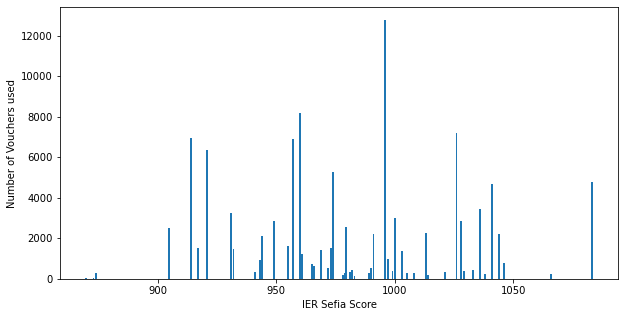

In [58]:
x= sefia_lga['IER']
y= sefia_lga['Voucher_Count']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y) 
plt.xlabel("IER Sefia Score")
plt.ylabel('Number of Vouchers used')
 
plt.show()

# IEO

In [60]:
sefia_lga = pd.DataFrame(sa_vouchers_scores[['Participant_LGA','IEO']].value_counts(), columns=['Voucher_Count'],)
sefia_lga = sefia_lga.sort_values(by = ['IEO'], ascending=True)
sefia_lga.reset_index(inplace = True)

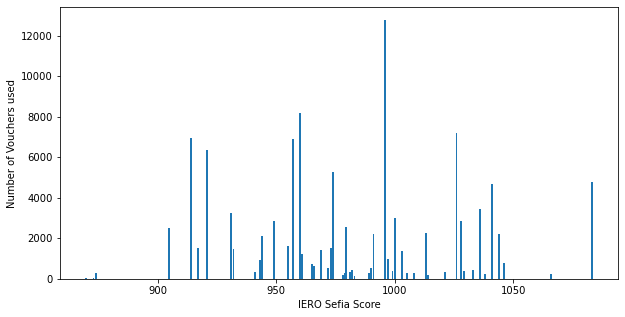

In [62]:
x= sefia_lga['IEO']
y= sefia_lga['Voucher_Count']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y) 
plt.xlabel("IERO Sefia Score")
plt.ylabel('Number of Vouchers used')
 
plt.show()

In [27]:
#1. sa_vouchers_scores -> unique sports are there -> .set() / .unique() -> length (len)
#2. all LGAs
#3. year -> Voucher_Claim_Year

In [ ]:
####
def lga_table():
    result = data.groupby(['Paticipant_LGA', 'Voucher_Claim_Year'])
    
                        count---> of the Voucher_Sport in diff. LGAs over the given period time, i.e., 2015,2016...
                        population--->
                        percent of voucher--->
                        percent of population---> 
 
    return result

lga_table(sa_vouchers_score)
            

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [ ]:
qld_vouchers = pd.read_csv('C:\\Users\\User\\Desktop\\COMP2200_DS\\data-science-portfolio-hhhaamza\\files_P2\\round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

In [ ]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()